In [2]:
import json
import os
import pandas as pd


def load_data(file_path):
    """
    Load data from a JSON file.
    
    :param file_path: Path to the JSON file.
    :return: Parsed JSON data.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def get_results(data):
    results = {entry['id']: entry['response'] for entry in data}
    return results

def get_tokens(data):
    tokens = {entry['id']: entry['tokens']['total_tokens'] for entry in data}
    return tokens

def get_gt(data):
    gt = {entry['id']: entry['is_blooming'] for entry in data}
    return gt

dfs = []
for file in os.listdir("results"):
    if file.endswith(".json"):
        with open(os.path.join("results", file), 'r') as f:
            data = json.load(f)
        results = get_results(data)
        tokens = get_tokens(data)
        name = os.path.splitext(file)[0]
        dfs.append(pd.DataFrame.from_dict(results, orient='index', columns=[name]))

for file in os.listdir("ground_truth"):
    if file.endswith(".json"):
        with open(os.path.join("ground_truth", file), 'r') as f:
            data = json.load(f)
        gt = get_gt(data)
        name = os.path.splitext(file)[0]
        dfs.append(pd.DataFrame.from_dict(gt, orient='index', columns=[name]))

df = pd.concat(dfs, axis=1)
df.rename(columns={
    df.columns[0]: "LLM only",
    df.columns[1]: "Agent + Browser",
    df.columns[2]: "Single Agent + Data",
    df.columns[3]: "Multi Agent + Data",
    df.columns[4]: "Apfel Agent",
    df.columns[5]: "Birke Agent",
    df.columns[6]: "Erle Agent",
    df.columns[7]: "Hasel Agent",
    df.columns[8]: "Winterraps Agent",
    df.columns[9]: "Winterroggen Agent"
}, inplace=True)

In [3]:
df.iloc[:, -3].values

array([False, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False])

In [4]:
def make_comparison_matrix(df, pos):
    comparison_matrix_0 = pd.DataFrame(
        {
            col: (df[col].values == df.iloc[:, pos].values)
            for col in df.columns[:-3]
        }
    )
    return comparison_matrix_0

comparison_matrix_0 = make_comparison_matrix(df, -3)
comparison_matrix_5 = make_comparison_matrix(df, -2)
comparison_matrix_10 = make_comparison_matrix(df, -1)

In [5]:
df_heatmap = pd.concat([comparison_matrix_0.sum(axis=0)/len(comparison_matrix_0), 
 comparison_matrix_5.sum(axis=0)/len(comparison_matrix_5), 
 comparison_matrix_10.sum(axis=0)/len(comparison_matrix_10)], axis=1)
df_heatmap.columns = ['0', '5', '10']
df_heatmap

,0,5,10
LLM only,0.583333,0.583333,0.500000
Agent + Browser,0.666667,0.666667,0.583333
Single Agent + Data,0.833333,0.833333,0.916667
Multi Agent + Data,0.916667,0.916667,1.000000
Apfel Agent,0.708333,0.708333,0.791667
Birke Agent,0.666667,0.666667,0.750000
Erle Agent,0.625000,0.625000,0.708333
Hasel Agent,0.750000,0.750000,0.833333
Winterraps Agent,0.708333,0.708333,0.791667
Winterroggen Agent,0.708333,0.708333,0.791667


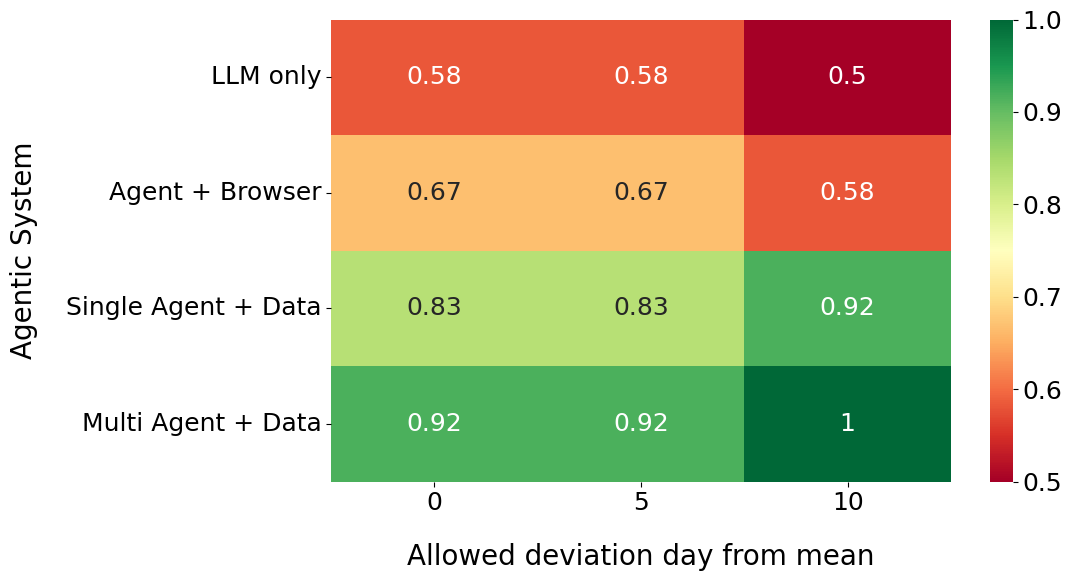

In [6]:
plt.rcParams.update({'font.size': 18})


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap[0:4], annot=True, cmap="RdYlGn", xticklabels=df_heatmap.columns[:4], yticklabels=df_heatmap.index[:4])
#plt.title("Comparison Heatmap: Predictions vs Ground Truth")
plt.xlabel("Allowed deviation day from mean", fontsize=20,labelpad=20)
plt.ylabel("Agentic System", fontsize=20, labelpad=20)
plt.show()

In [7]:
cm = comparison_matrix_10
cm = cm.groupby(cm.index // 4).sum()/4
cm.index = ["Apfel", "Birke", "Erle", "Hasel", "Winterraps", "Winterroggen"]
cm = cm.transpose()

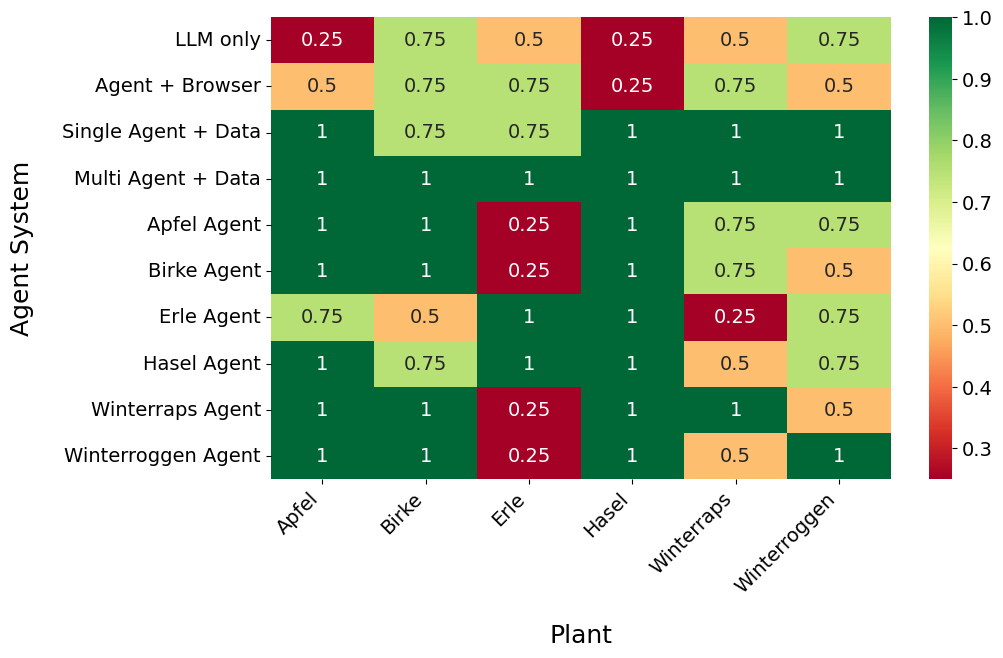

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap="RdYlGn", xticklabels=cm.columns, yticklabels=cm.index)
#plt.title("Comparison Heatmap: Predictions vs Ground Truth")
plt.xlabel("Plant", fontsize=18, labelpad=20)
plt.ylabel("Agentic System", fontsize=18, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.show()

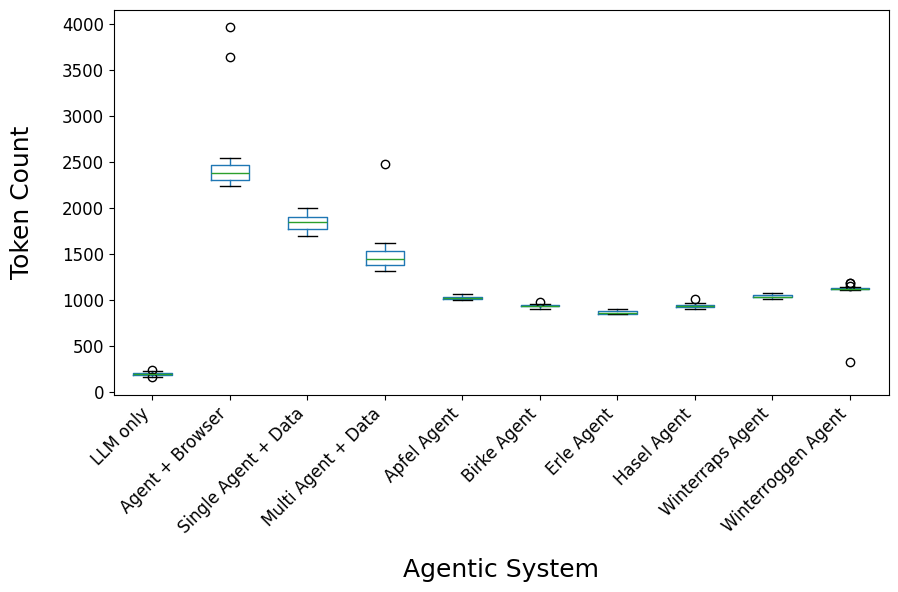

In [9]:
import matplotlib.pyplot as plt
#token usage
plt.rcParams.update({'font.size': 12})

dfs = []
for file in os.listdir("results"):
    if file.endswith(".json"):
        with open(os.path.join("results", file), 'r') as f:
            data = json.load(f)
        tokens = get_tokens(data)
        name = os.path.splitext(file)[0]
        dfs.append(pd.DataFrame.from_dict(tokens, orient='index', columns=[name]))

df = pd.concat(dfs, axis=1)
df.rename(columns={
    df.columns[0]: "LLM only",
    df.columns[1]: "Agent + Browser",
    df.columns[2]: "Single Agent + Data",
    df.columns[3]: "Multi Agent + Data",
    df.columns[4]: "Apfel Agent",
    df.columns[5]: "Birke Agent",
    df.columns[6]: "Erle Agent",
    df.columns[7]: "Hasel Agent",
    df.columns[8]: "Winterraps Agent",
    df.columns[9]: "Winterroggen Agent"
}, inplace=True)
df.boxplot(rot=90, figsize=(10, 5), grid=False)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Token Count", fontsize=18, labelpad=20)
plt.xlabel("Agentic System", fontsize=18, labelpad=15)
plt.show()


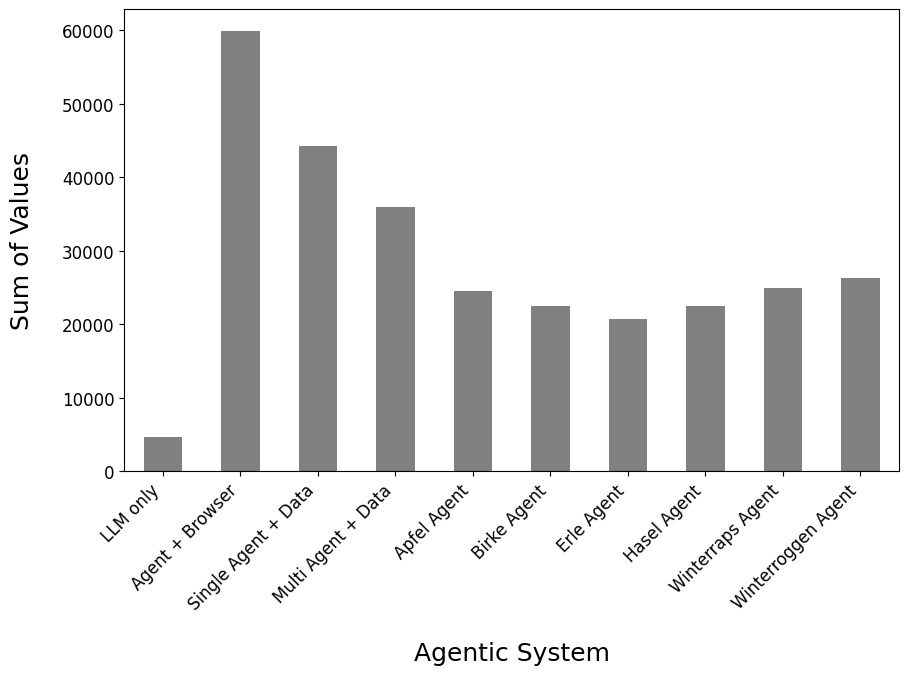

In [11]:


df.sum(axis=0).plot(kind='bar', figsize=(10, 6), color='grey')
plt.xlabel("Agentic System", fontsize=18, labelpad=20)
plt.ylabel("Sum of Values", fontsize=18, labelpad=20)
#plt.title("Sum of Values per Agentic System", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()